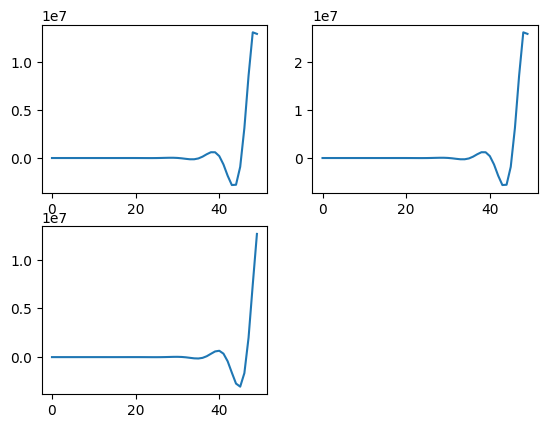

In [1]:
# LQR Example:
import numpy as np
import matplotlib.pyplot as plt
A =np.mat('1.9500, -0.0250,-1.6000; 1.6000, 1.1000,-3.2000; 0.4250,    0.1875,    0.3000')
B =np.mat('0 1 0; 1 1 1').T
nu = 2
nx = 3
# simulate original system without control (open loop)
N = 50;  #number of discrete time steps
x = np.mat(np.zeros((3,N)))
x[:,0] = np.array([[1],[2],[3]])
for k in np.arange(N-1):
    x[:,k+1] = A@x[:,k]
time = np.arange(N)
plt.subplot(2,2,1)
plt.plot(time,x[0,:].T)
plt.subplot(2,2,2)
plt.plot(time, x[1,:].T)
plt.subplot(2,2,3)
plt.plot(time, x[2,:].T)

In [3]:
# use LQR to design controller to stabilize the system
import scipy.linalg as la
nx = 3
nu = 2

Q = np.eye(nx) 
R = np.eye(nu)

# first let's verify Riccati recursion
Nr = 20 
P =np.zeros((nx,nx,Nr))

for j in range(Nr-1):
    P[:,:,j+1] =Q +A.T@P[:,:,j]@A - A.T@P[:,:,j]@B@la.inv(R+B.T@P[:,:,j]@B)@B.T@P[:,:,j]@A


Pstar = P[:,:,19]
Kstar = la.inv(R+B.T@Pstar@B)@B.T@Pstar@A
# print(P[:,:,18])
# print(P[:,:,10])
# print(P[:,:,2])

import control as control

R1,R2,R3 = control.dlqr(A,B,Q,R)

print(R2)



[[ 47.07367185  -7.12318629 -57.71056369]
 [ -7.12318629   2.96775072   7.6696549 ]
 [-57.71056369   7.6696549   76.37877293]]


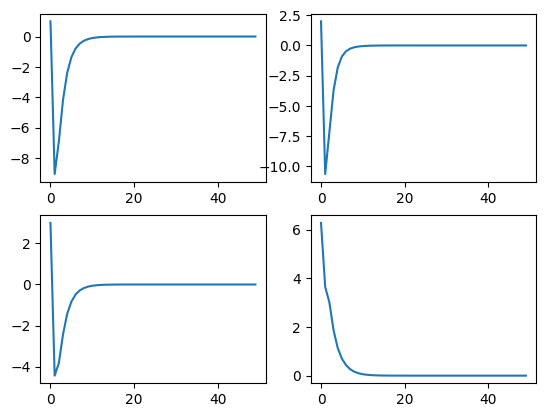

In [6]:
#check LQR closed-loop performance
# simulate original system with control (closed-loop)
N = 50;  #number of discrete time steps
x = np.mat(np.zeros((nx,N)))
u = np.mat(np.zeros((nu,N)))
norm_u = np.zeros(N)
x[:,0] = np.array([[1],[2],[3]])
for k in np.arange(N-1):
    u[:,k] = -Kstar@x[:,k]
    norm_u[k] = la.norm(u[:,k])
    x[:,k+1] = A@x[:,k] + B@u[:,k]
    
time = np.arange(N)
plt.subplot(2,2,1)
plt.plot(time,x[0,:].T)
plt.subplot(2,2,2)
plt.plot(time, x[1,:].T)
plt.subplot(2,2,3)
plt.plot(time, x[2,:].T)
plt.subplot(2,2,4)
plt.plot(time, norm_u)

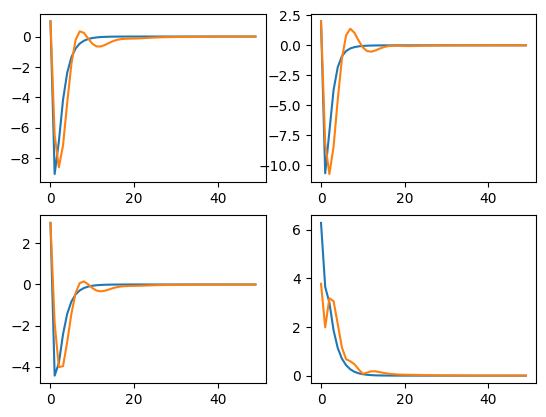

In [11]:
# change weighting matrix and see the effects
Q = np.mat('100 0 0;0 1 0; 0 0 1')
R = np.eye(nu)

P =np.zeros((nx,nx,Nr))

for j in range(Nr-1):
    P[:,:,j+1] =Q +A.T@P[:,:,j]@A - A.T@P[:,:,j]@B@la.inv(R+B.T@P[:,:,j]@B)@B.T@P[:,:,j]@A


Pnew = P[:,:,19]
Knew = la.inv(R+B.T@Pnew@B)@B.T@Pnew@A

N = 50;  #number of discrete time steps
xnew = np.mat(np.zeros((nx,N)))
unew = np.mat(np.zeros((nu,N)))
norm_u_new = np.zeros(N)
xnew[:,0] = np.array([[1],[2],[3]])
for k in np.arange(N-1):
    unew[:,k] = -Knew@xnew[:,k]
    norm_u_new[k] = la.norm(unew[:,k])
    xnew[:,k+1] = A@xnew[:,k] + B@unew[:,k]
    
time = np.arange(N)
plt.subplot(2,2,1)
plt.plot(time,x[0,:].T)
plt.plot(time,xnew[0,:].T)

plt.subplot(2,2,2)
plt.plot(time, x[1,:].T)
plt.plot(time, xnew[1,:].T)

plt.subplot(2,2,3)
plt.plot(time, x[2,:].T)
plt.plot(time, xnew[2,:].T)
plt.subplot(2,2,4)
plt.plot(time, norm_u)
plt.plot(time, norm_u_new)



In [10]:
print(Kstar)
print(Knew)

[[-0.36370366  0.79296304 -0.83610368]
 [-1.26318866  0.49353373  2.13949132]]
[[-0.36370366  0.79296304 -0.83610368]
 [-1.26318866  0.49353373  2.13949132]]
